# Final Checks for model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(f"D:/Docs/train_2.csv", encoding='mac_roman')

In [3]:
df.head(3)

,ticket_id,agency_name,city,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department",CHICAGO,250.0,20,10,25.0,0,0,305.0,0.0,305.0,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department",Detroit,750.0,20,10,75.0,0,0,855.0,780.0,75.0,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department",DETROIT,250.0,0,0,0.0,0,0,0.0,0.0,0.0,not responsible by disposition,NaN


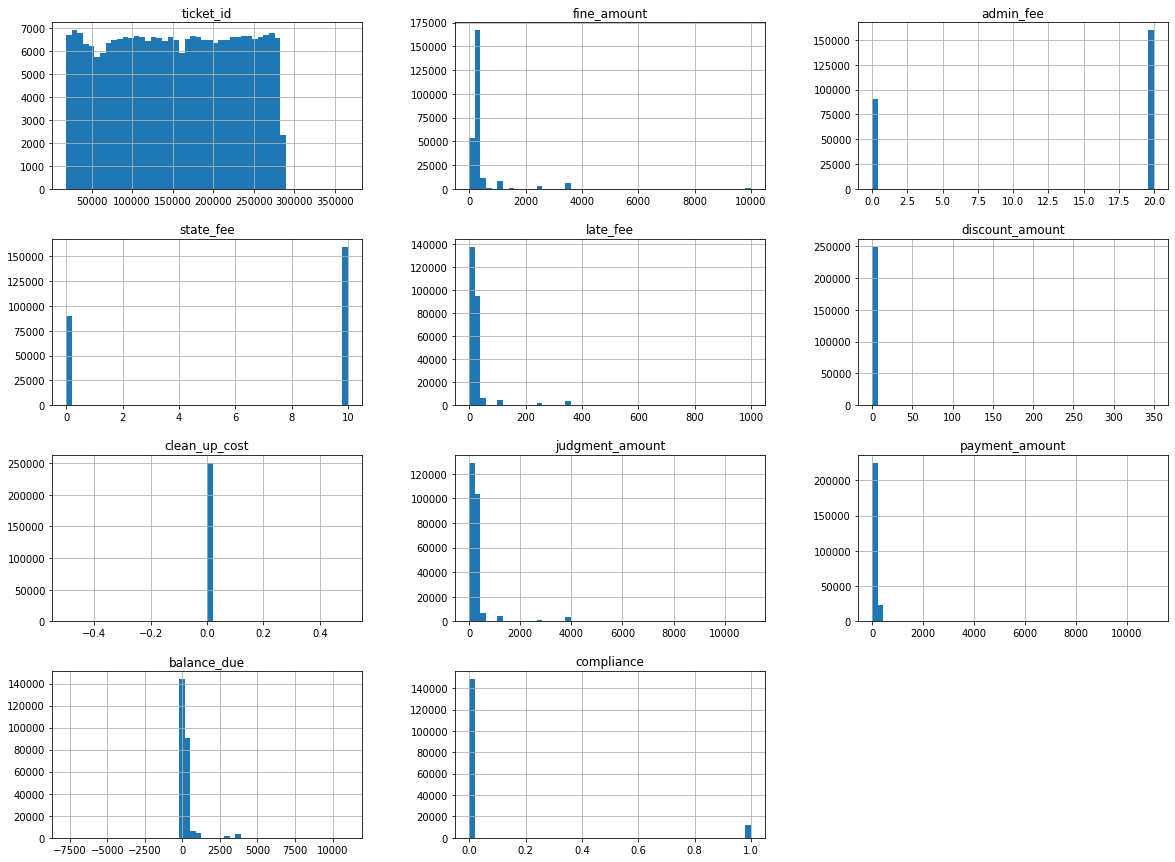

In [4]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

## 1. Use ONLY compliance available columns

In [8]:
df = df[df['compliance'].notna()]
df.shape

(159880, 14)

In [9]:
df['fine_amount'] = df['fine_amount'].fillna(0)
df.shape

(159880, 14)

In [10]:
df['compliance'].value_counts()

0.0    148283
1.0     11597
Name: compliance, dtype: int64

## 2. Build the model - RandomForest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
feature_names_tickets = ['fine_amount', 'late_fee', 'judgment_amount']
X_tickets = df[feature_names_tickets]
y_tickets = df['compliance']

#Test size is chosen to get X_test value of 61,001 as the same is provided test data
X_train, X_test, y_train, y_test = train_test_split(X_tickets, y_tickets, test_size = 0.38153900, random_state = 0)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
y_pred = clf.predict(X_test)
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9290175570892281


## 4. Check ROC / AUC (Main test split)

<ipython-input-16-dcae8e725b51>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


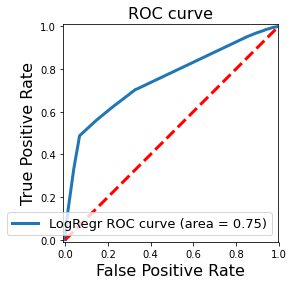

In [16]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

## 5. Check ROC / AUC (Real Test Data)

In [17]:
# First we need to load our test dataset
df1 = pd.read_csv(f"D:/Docs/test_2.csv", encoding='mac_roman')
df1.shape


(61001, 8)

In [18]:
df1.head(5)

,ticket_id,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount
0,284932,200,20,10,20.0,0,0,250.0
1,285362,1000,20,10,100.0,0,0,1130.0
2,285361,100,20,10,10.0,0,0,140.0
3,285338,200,20,10,20.0,0,0,250.0
4,285346,100,20,10,10.0,0,0,140.0


In [19]:
feature_names_test = ['fine_amount', 'late_fee', 'judgment_amount']
X_test_new = df1[feature_names_test]
print(X_test_new.shape)

(61001, 3)


In [40]:
X_test.head(3)

,fine_amount,late_fee,judgment_amount
248437,500.0,50.0,580.0
113965,250.0,25.0,305.0
150096,25.0,0.0,55.0


In [41]:
X_test_new.head(3)

,fine_amount,late_fee,judgment_amount
0,200,20.0,250.0
1,1000,100.0,1130.0
2,100,10.0,140.0


<ipython-input-37-e1dfae6d2024>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


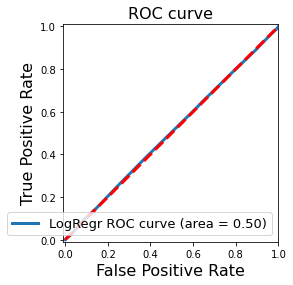

In [37]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, clf.predict_proba(X_test_new)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [26]:
score = clf.score(X_test_new, y_test)
print(score)

0.9137227258569531


In [27]:
y_pred_new = clf.predict(X_test_new)
print(y_pred_new.sum())

1021.0


In [31]:
#print(clf.predict_proba(X_test))
pred_values_new = pd.DataFrame(clf.predict_proba(X_test)) 
pred_values_new.to_csv('result_pred_RF-new.csv')

In [29]:
pred_values_new.value_counts()

0.0    59980
1.0     1021
dtype: int64